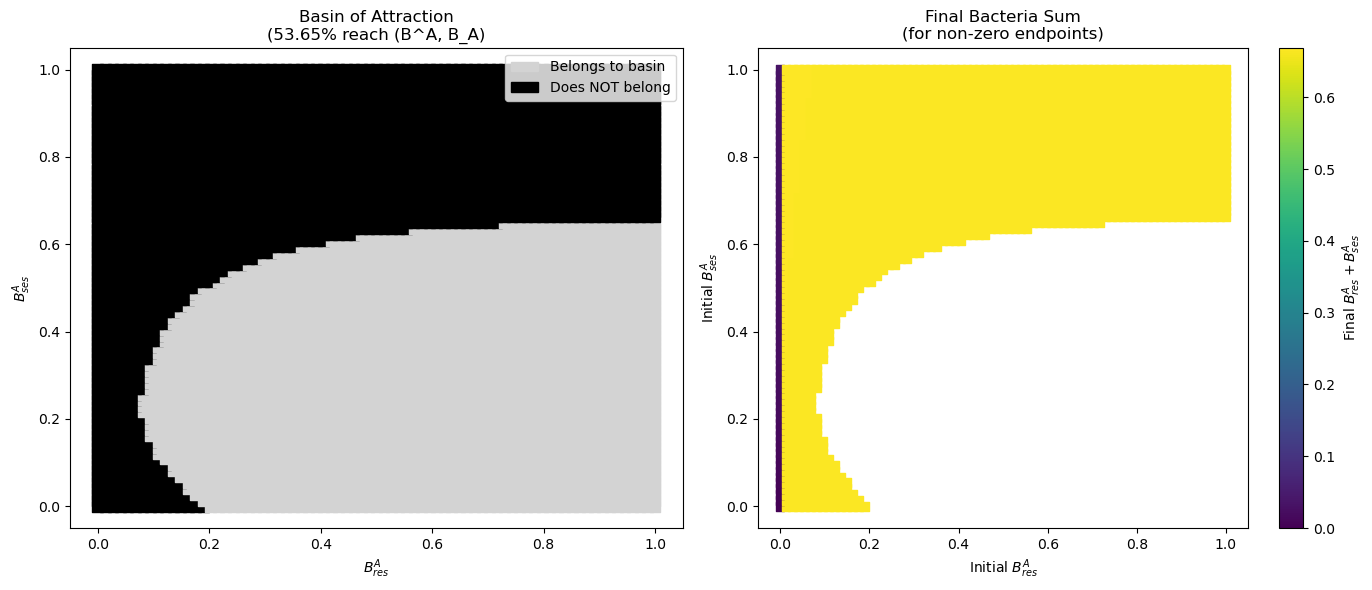

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.patches as mpatches

rho1 = 0.4
rho2 = 0.125
alpha1 = 0.2
delta2 = 0.5
CC = 0.887
A = 0.5

def system(t, y):
    BA = y[0] + y[1]
    dB_A_res = rho1 * y[0] * (1 - BA / CC) - alpha1 * A * y[0]
    dB_A_ses = rho2 * y[1] * (1 - BA / CC) + alpha1 * A * y[0] - delta2 * (A / (1 + A)) * y[1]
    return [dB_A_res, dB_A_ses]

t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

num_points = 75
B_A_res_values = np.linspace(0, 1, num_points)
B_A_ses_values = np.linspace(0, 1, num_points)
X, Y = np.meshgrid(B_A_res_values, B_A_ses_values)

S = CC * (1 - (alpha1 * A / rho1))
B_sub_A = (alpha1 * A * S) / (delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1)))
B_sup_A = S - B_sub_A

basin = np.zeros_like(X)

final_states = []
initial_conditions_nonzero = []

for i in range(num_points):
    for j in range(num_points):
        y0 = [X[i, j], Y[i, j]]
        sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)
        final_state = (sol.y[:, -1]-[B_sup_A,B_sub_A])
        if np.linalg.norm(final_state) <= 1e-4:
            basin[i, j] = 1
        else:
            basin[i, j] = 0
            final_states.append(sol.y[:, -1])
            initial_conditions_nonzero.append(y0)

# Prepare for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Basin of attraction

colors = np.where(basin.flatten() == 1, 'lightgrey', 'black')
axes[0].scatter(X.flatten(), Y.flatten(), c=colors, s=60, marker='s')
axes[0].set_xlabel(r"$B^A_{res}$")
axes[0].set_ylabel(r"$B^A_{ses}$")
percent_arriben = (np.sum(basin == 1) / (num_points ** 2)) * 100
axes[0].set_title(f"Basin of Attraction\n({percent_arriben:.2f}% reach (B^A, B_A)")
belongs_patch = mpatches.Patch(color='lightgrey', label='Belongs to basin')
not_belongs_patch = mpatches.Patch(color='black', label='Does NOT belong')
axes[0].legend(handles=[belongs_patch, not_belongs_patch])

# Second plot: Final destinations of non-zero trajectories
if final_states:
    final_states = np.array(final_states)
    initial_conditions_nonzero = np.array(initial_conditions_nonzero)
    sc = axes[1].scatter(
    initial_conditions_nonzero[:, 0],
    initial_conditions_nonzero[:, 1],
    c=final_states[:, 0] + final_states[:, 1],
    cmap='viridis',
    s=37, 
    marker='s'
    )

    axes[1].set_xlabel(r"Initial $B^A_{res}$")
    axes[1].set_ylabel(r"Initial $B^A_{ses}$")
    axes[1].set_title("Final Bacteria Sum\n(for non-zero endpoints)")
    fig.colorbar(sc, ax=axes[1], label=r'Final $B^A_{res} + B^A_{ses}$')
else:
    axes[1].text(0.5, 0.5, "All points converged to (0,0)", 
                 ha='center', va='center', fontsize=12)
    axes[1].set_axis_off()

plt.tight_layout()

plt.savefig('Conques/T=27,alpha0_3,bio_delta025_coex.png')
plt.show()


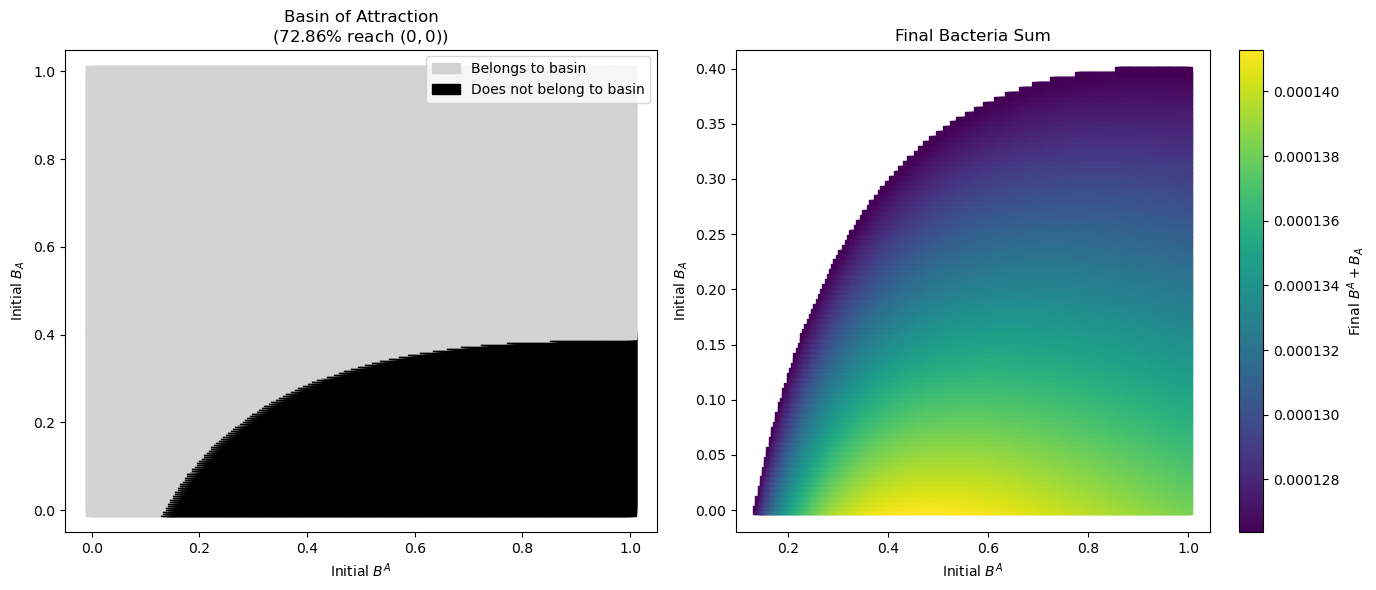

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.patches as mpatches

rho1 = 0.4
rho2 = 0.125
alpha1 = 0.2
delta2 = 0.5
CC = 0.887
A = 2.35

def system(t, y):
    BA = y[0] + y[1]
    dB_A_res = rho1 * y[0] * (1 - BA / CC) - alpha1 * A * y[0]
    dB_A_ses = rho2 * y[1] * (1 - BA / CC) + alpha1 * A * y[0] - delta2 * (A / (1 + A)) * y[1]
    return [dB_A_res, dB_A_ses]

t_span = (0, 100)
t_eval = np.linspace(*t_span, 500)

num_points = 225
B_A_res_values = np.linspace(0, 1, num_points)
B_A_ses_values = np.linspace(0, 1, num_points)
X, Y = np.meshgrid(B_A_res_values, B_A_ses_values)

S = CC * (1 - (alpha1 * A / rho1))
B_sub_A = (alpha1 * A * S) / (delta2 * (A / (1 + A)) + alpha1 * A * (1 - (rho2 / rho1)))
B_sup_A = S - B_sub_A

basin = np.zeros_like(X)

final_states = []
initial_conditions_nonzero = []

for i in range(num_points):
    for j in range(num_points):
        y0 = [X[i, j], Y[i, j]]
        sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)
        final_state = (sol.y[:, -1]-[0,0])
        if np.linalg.norm(final_state) <= 1e-4:
            basin[i, j] = 1
        else:
            basin[i, j] = 0
            final_states.append(sol.y[:, -1])
            initial_conditions_nonzero.append(y0)

# Prepare for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Basin of attraction

colors = np.where(basin.flatten() == 1, 'lightgrey', 'black')
axes[0].scatter(X.flatten(), Y.flatten(), c=colors, s=60, marker='s')
axes[0].set_xlabel(r"Initial $B^A$")
axes[0].set_ylabel(r"Initial $B_A$")
percent_arriben = (np.sum(basin == 1) / (num_points ** 2)) * 100
axes[0].set_title(f"Basin of Attraction\n({percent_arriben:.2f}% reach $(0,0)$)")
belongs_patch = mpatches.Patch(color='lightgrey', label='Belongs to basin')
not_belongs_patch = mpatches.Patch(color='black', label='Does not belong to basin')
axes[0].legend(handles=[belongs_patch, not_belongs_patch])

# Second plot: Final destinations of non-zero trajectories
if final_states:
    final_states = np.array(final_states)
    initial_conditions_nonzero = np.array(initial_conditions_nonzero)
    sc = axes[1].scatter(
    initial_conditions_nonzero[:, 0],
    initial_conditions_nonzero[:, 1],
    c=final_states[:, 0] + final_states[:, 1],
    cmap='viridis',
    s=37, 
    marker='s'
    )

    axes[1].set_xlabel(r"Initial $B^A$")
    axes[1].set_ylabel(r"Initial $B_A$")
    axes[1].set_title("Final Bacteria Sum")
    fig.colorbar(sc, ax=axes[1], label=r'Final $B^A + B_A$')
else:
    axes[1].text(0.5, 0.5, "All points converged to (0,0)", 
                 ha='center', va='center', fontsize=12)
    axes[1].set_axis_off()

plt.tight_layout()

plt.savefig('basin_attract.pdf')
plt.show()